# Data Science for Bioinformatics - Week 02

## Learning goals for this exercise

Get a feel for some Python functions that we use a lot for data exploring
 
 * shape
 * len
 * columns
 * head
 * describe
 * filter
 * groupby
 * agg
 * assign


## The mammals dataset

In [28]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Getting the path of your current open file
current_path = os.getcwd()
print(current_path)

# Read the CSV file
mammals = pd.read_csv('dataset.01.rsbl20150010supp1.csv')
mammals.head()

c:\Users\Peter\DSIB\exercisesE24\wk2


,gene,Species,labs,chrMark,chr,dN,dS,dNdS,RPKM,Tau,GC3
0,ENSG00000101871,Chimp,Chimp-X,X,X,3.00669,3.15631,0.952597,31.60,0.711382,0.615502
1,ENSG00000047648,Chimp,Chimp-X,X,X,3.27182,5.87147,0.557240,13.90,0.839102,0.622543
2,ENSG00000130150,Chimp,Chimp-X,X,X,7.02044,3.13716,2.237833,26.30,0.318594,0.393064
3,ENSG00000165197,Chimp,Chimp-X,X,X,1.01784,2.05438,0.495449,9.02,0.688717,0.490141
4,ENSG00000188158,Chimp,Chimp-X,X,X,3.03630,4.10205,0.740191,11.30,0.912053,0.461592


In [2]:
# Drop rows with any NA values
mammals = mammals.dropna()
mammals.head()

Note that we used `pd.read_csv()` to read the input file.

## Q1.1: Can you use `pd.read_table()` to read it?

In [4]:
pd.read_table('dataset.01.rsbl20150010supp1.csv', delimiter=',').head()

,gene,Species,labs,chrMark,chr,dN,dS,dNdS,RPKM,Tau,GC3
0,ENSG00000101871,Chimp,Chimp-X,X,X,3.00669,3.15631,0.952597,31.60,0.711382,0.615502
1,ENSG00000047648,Chimp,Chimp-X,X,X,3.27182,5.87147,0.557240,13.90,0.839102,0.622543
2,ENSG00000130150,Chimp,Chimp-X,X,X,7.02044,3.13716,2.237833,26.30,0.318594,0.393064
3,ENSG00000165197,Chimp,Chimp-X,X,X,1.01784,2.05438,0.495449,9.02,0.688717,0.490141
4,ENSG00000188158,Chimp,Chimp-X,X,X,3.03630,4.10205,0.740191,11.30,0.912053,0.461592


## Inspect data

Use `shape`, `len`, `columns`, `head` and `describe` to inspect the dataset

In [5]:
mammals.shape

(17327, 11)

In [6]:
len(mammals)

17327

In [7]:
mammals.columns

Index(['gene', 'Species', 'labs', 'chrMark', 'chr', 'dN', 'dS', 'dNdS', 'RPKM',
       'Tau', 'GC3'],
      dtype='object')

In [8]:
mammals.head()

,gene,Species,labs,chrMark,chr,dN,dS,dNdS,RPKM,Tau,GC3
0,ENSG00000101871,Chimp,Chimp-X,X,X,3.00669,3.15631,0.952597,31.60,0.711382,0.615502
1,ENSG00000047648,Chimp,Chimp-X,X,X,3.27182,5.87147,0.557240,13.90,0.839102,0.622543
2,ENSG00000130150,Chimp,Chimp-X,X,X,7.02044,3.13716,2.237833,26.30,0.318594,0.393064
3,ENSG00000165197,Chimp,Chimp-X,X,X,1.01784,2.05438,0.495449,9.02,0.688717,0.490141
4,ENSG00000188158,Chimp,Chimp-X,X,X,3.03630,4.10205,0.740191,11.30,0.912053,0.461592


In [19]:
mammals[mammals['chrMark'] == 'X']

,gene,Species,labs,chrMark,chr,dN,dS,dNdS,RPKM,Tau,GC3
0,ENSG00000101871,Chimp,Chimp-X,X,X,3.00669,3.15631,0.952597,31.600000,0.711382,0.615502
1,ENSG00000047648,Chimp,Chimp-X,X,X,3.27182,5.87147,0.557240,13.900000,0.839102,0.622543
2,ENSG00000130150,Chimp,Chimp-X,X,X,7.02044,3.13716,2.237833,26.300000,0.318594,0.393064
3,ENSG00000165197,Chimp,Chimp-X,X,X,1.01784,2.05438,0.495449,9.020000,0.688717,0.490141
4,ENSG00000188158,Chimp,Chimp-X,X,X,3.03630,4.10205,0.740191,11.300000,0.912053,0.461592
...,...,...,...,...,...,...,...,...,...,...,...
12975,ENSG00000165288,Mouse,Mouse-X,X,X,20.13340,86.52210,0.232697,10.151765,0.466357,0.350584
12976,ENSG00000180182,Mouse,Mouse-X,X,X,12.86350,71.08800,0.180952,107.229412,0.443714,0.425722
12977,ENSG00000205081,Mouse,Mouse-X,X,X,49.93710,28.18970,1.771466,3.379412,0.957645,0.266827
12978,ENSG00000165164,Mouse,Mouse-X,X,X,51.66620,43.37180,1.191239,1.146629,0.984477,0.320975


In [9]:
mammals.describe()

,dN,dS,dNdS,RPKM,Tau,GC3
count,17327.000000,17327.00000,17327.000000,17327.000000,17327.000000,17327.000000
mean,11.318502,25.06974,0.566063,183.209908,0.670170,0.576736
std,18.865116,36.73323,0.476104,1382.166732,0.214208,0.152463
min,1.000020,2.00041,0.010068,0.011400,0.073746,0.205128
25%,2.047370,5.24482,0.242799,27.217149,0.505324,0.450943
50%,5.021300,12.41280,0.440091,76.587059,0.688441,0.575397
75%,12.105000,30.52005,0.751260,171.476923,0.848398,0.698540
max,305.379000,792.53700,6.287399,127494.159231,1.000000,0.945205


## Q1.2: How many rows and columns are in the dataset?

17327 rows and 13 columns

## Q1.3: Which columns are text?

gene, species, labs, chrMark, chr

## Q1.4: Which columns are numbers?
dN, dNdS, RPKM, Tau, GC3

# Gene expression in the mammals dataset

## Q2.1: Visualize the distribution of gene expression (RPKM) in the dataset

Hint: Make a new code chunk and make a histogram that shows the distribution of RPKM when you ignore species information.

Also, what is the minimum and maximum RPKM value in the dataset?

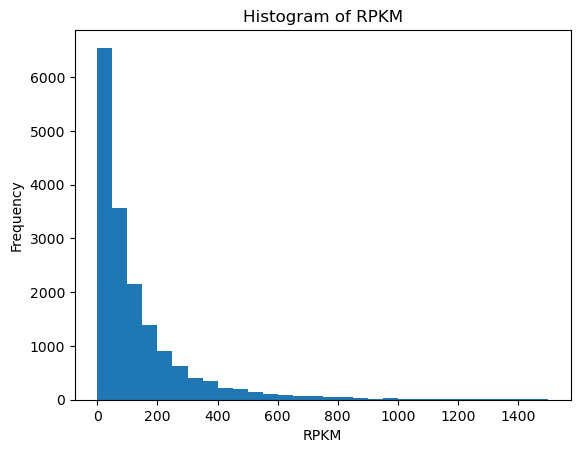

In [24]:
plt.hist(mammals['RPKM'], bins=30, range=(0, 1500))
plt.xlabel('RPKM')
plt.ylabel('Frequency')
plt.title('Histogram of RPKM')
plt.show()


In [25]:
mammals[mammals['RPKM'] > 1000]

,gene,Species,labs,chrMark,chr,dN,dS,dNdS,RPKM,Tau,GC3
42,ENSG00000171603,Chimp,Chimp-A,A,1,2.01684,8.85795,0.227687,1540.000000,0.816443,0.700315
72,ENSG00000116560,Chimp,Chimp-A,A,1,2.06657,3.09338,0.668062,1010.000000,0.176175,0.404059
137,ENSG00000159377,Chimp,Chimp-A,A,1,1.00633,3.10434,0.324169,1400.000000,0.616149,0.611321
208,ENSG00000153187,Chimp,Chimp-A,A,1,3.29971,4.28669,0.769757,1080.000000,0.224724,0.360601
263,ENSG00000165678,Chimp,Chimp-A,A,10,2.01967,2.09083,0.965966,1780.000000,0.483575,0.438953
...,...,...,...,...,...,...,...,...,...,...,...
16368,ENSG00000165678,Mouse,Mouse-A,A,14,3.80644,11.01090,0.345697,1678.823529,0.417922,0.437681
16879,ENSG00000163541,Mouse,Mouse-A,A,6,6.11947,23.59200,0.259388,1555.647059,0.548913,0.520958
16991,ENSG00000196821,Mouse,Mouse-A,A,17,4.03855,9.30412,0.434060,1144.882353,0.527206,0.582418
17055,ENSG00000111666,Mouse,Mouse-A,A,10,5.26401,16.34880,0.321981,2017.647059,0.866602,0.414286


## Q2.2: Make a new variable called "expression" that is the log10(RPKM+1)

Hint: use the `assign` function

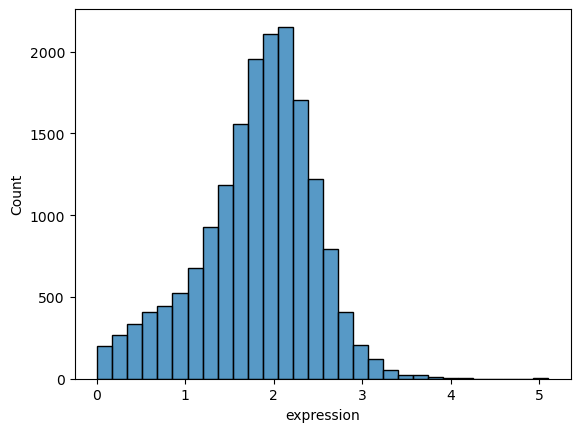

In [29]:
mammals = mammals.assign(expression = lambda x: np.log10(x['RPKM'] + 1))
sns.histplot(mammals['expression'], bins=30)
plt.show()

## Q2.3: Visualize the overall distribution of the expression but for each species separately?

Hint: Make histograms and use `FacetGrid` to make subplots.

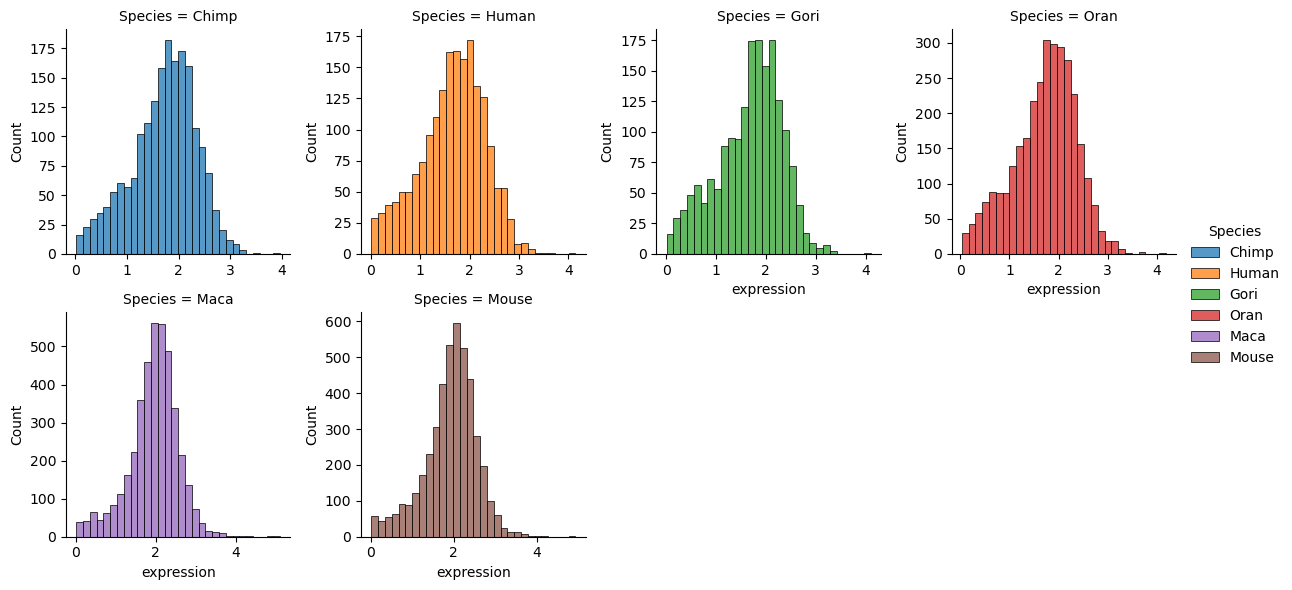

In [52]:
g = sns.FacetGrid(mammals, col='Species', col_wrap=4, sharex=False, sharey=False, hue='Species')
g.map(sns.histplot, 'expression', bins=30)
g.add_legend()
plt.show()

## Q2.4: Visualize the overall distribution of the expression in humans and mouse.

You probably need a `filter()` - and then you can choose how you will present it.

Also: we can compare things using different operators.

You can find them with

`?Comparison`

And the special `%in%` is described here:

`?match`

.... I use `%in%` a lot!

In [13]:
"Hello" in ["Hello", "world"]

In [14]:
"Hello" in ["Goodbye", "cruel", "world"]

In [ ]:
mammalsfilter = mammals[mammals['Species'].isin(['Human', 'Mouse'])]
sns.histplot(mammalsfilter['expression'], bins=30,color="hotpink")
plt.show()

In [ ]:
mammalsfilter = mammals[mammals['Species'].isin(['Human', 'Mouse'])]

# Create a histogram with a rainbow colormap
n_bins = 30
colors = plt.cm.rainbow(np.linspace(0, 1, n_bins))

sns.histplot(mammalsfilter['expression'], bins=n_bins, palette=colors)
plt.show()

## Q2.5: What is the mean, median and standard deviation of the expression for each Species?

Hint: `assign`, `groupby` and `agg`

In [32]:
mammals.groupby('Species')['RPKM'].agg(['mean', 'median', 'std'])

,mean,median,std
Species,,,
Chimp,123.500933,59.250000,284.058861
Gori,118.718758,57.700000,347.166822
Human,123.580315,50.125000,388.674359
Maca,262.817346,98.351154,2379.330052
Mouse,223.665482,97.164706,1400.891684
Oran,131.390886,61.700000,361.240781


# Open question

Some open questions that you can answer (pick a single one - or come up with your own question!)

 * Are dNdS values the same for all species?

 * Are high dNdS genes sitting on autosomes or X/Y chromosomes?

 * Are genes expression the same across species?

If you can't really solve these - then think about what you would like to do: i.e. describe in words what you would like your code to do.

Again, you are welcome to use chatGPT and/or google to help you.

In [33]:
mammals.groupby('Species')['dNdS'].agg(['mean', 'median', 'std'])

,mean,median,std
Species,,,
Chimp,0.720137,0.532771,0.548985
Gori,0.719036,0.534886,0.542357
Human,0.709929,0.518442,0.558710
Maca,0.559961,0.461717,0.439762
Mouse,0.360151,0.289639,0.290207
Oran,0.598400,0.480156,0.485666


In [46]:
mammals['third_quantile'] = mammals.groupby('Species')['dNdS'].transform(lambda x: x.quantile(0.75))

high_dNdS_counts = mammals[mammals['dNdS'] > mammals['third_quantile']].groupby(['Species', 'chrMark']).size().reset_index(name='high_dNdS_counts')

pivot_counts = high_dNdS_counts.pivot(index='Species', columns='chrMark', values='high_dNdS_counts').fillna(0)

pivot_counts['autosomal_X_ratio'] = pivot_counts['A'] / pivot_counts['X']

pivot_counts[['autosomal_X_ratio']]

chrMark,autosomal_X_ratio
Species,
Chimp,78.500000
Gori,39.818182
Human,57.750000
Maca,30.090909
Mouse,24.906977
Oran,43.222222
